In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


In [2]:
# Define data paths
train_dir = "C:/Users/Dell/OneDrive/Desktop/AnshuRani Project/Dataset/train"  # data train path
test_dir = "C:/Users/Dell/OneDrive/Desktop/AnshuRani Project/Dataset/test"   # data test path


In [3]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Separate validation generator
val_datagen = ImageDataGenerator(rescale=1.0 / 255)
val_generator = val_datagen.flow_from_directory(
    test_dir,  # Use part of the test data for validation
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)



Found 6484 images belonging to 5 classes.
Found 4310 images belonging to 5 classes.


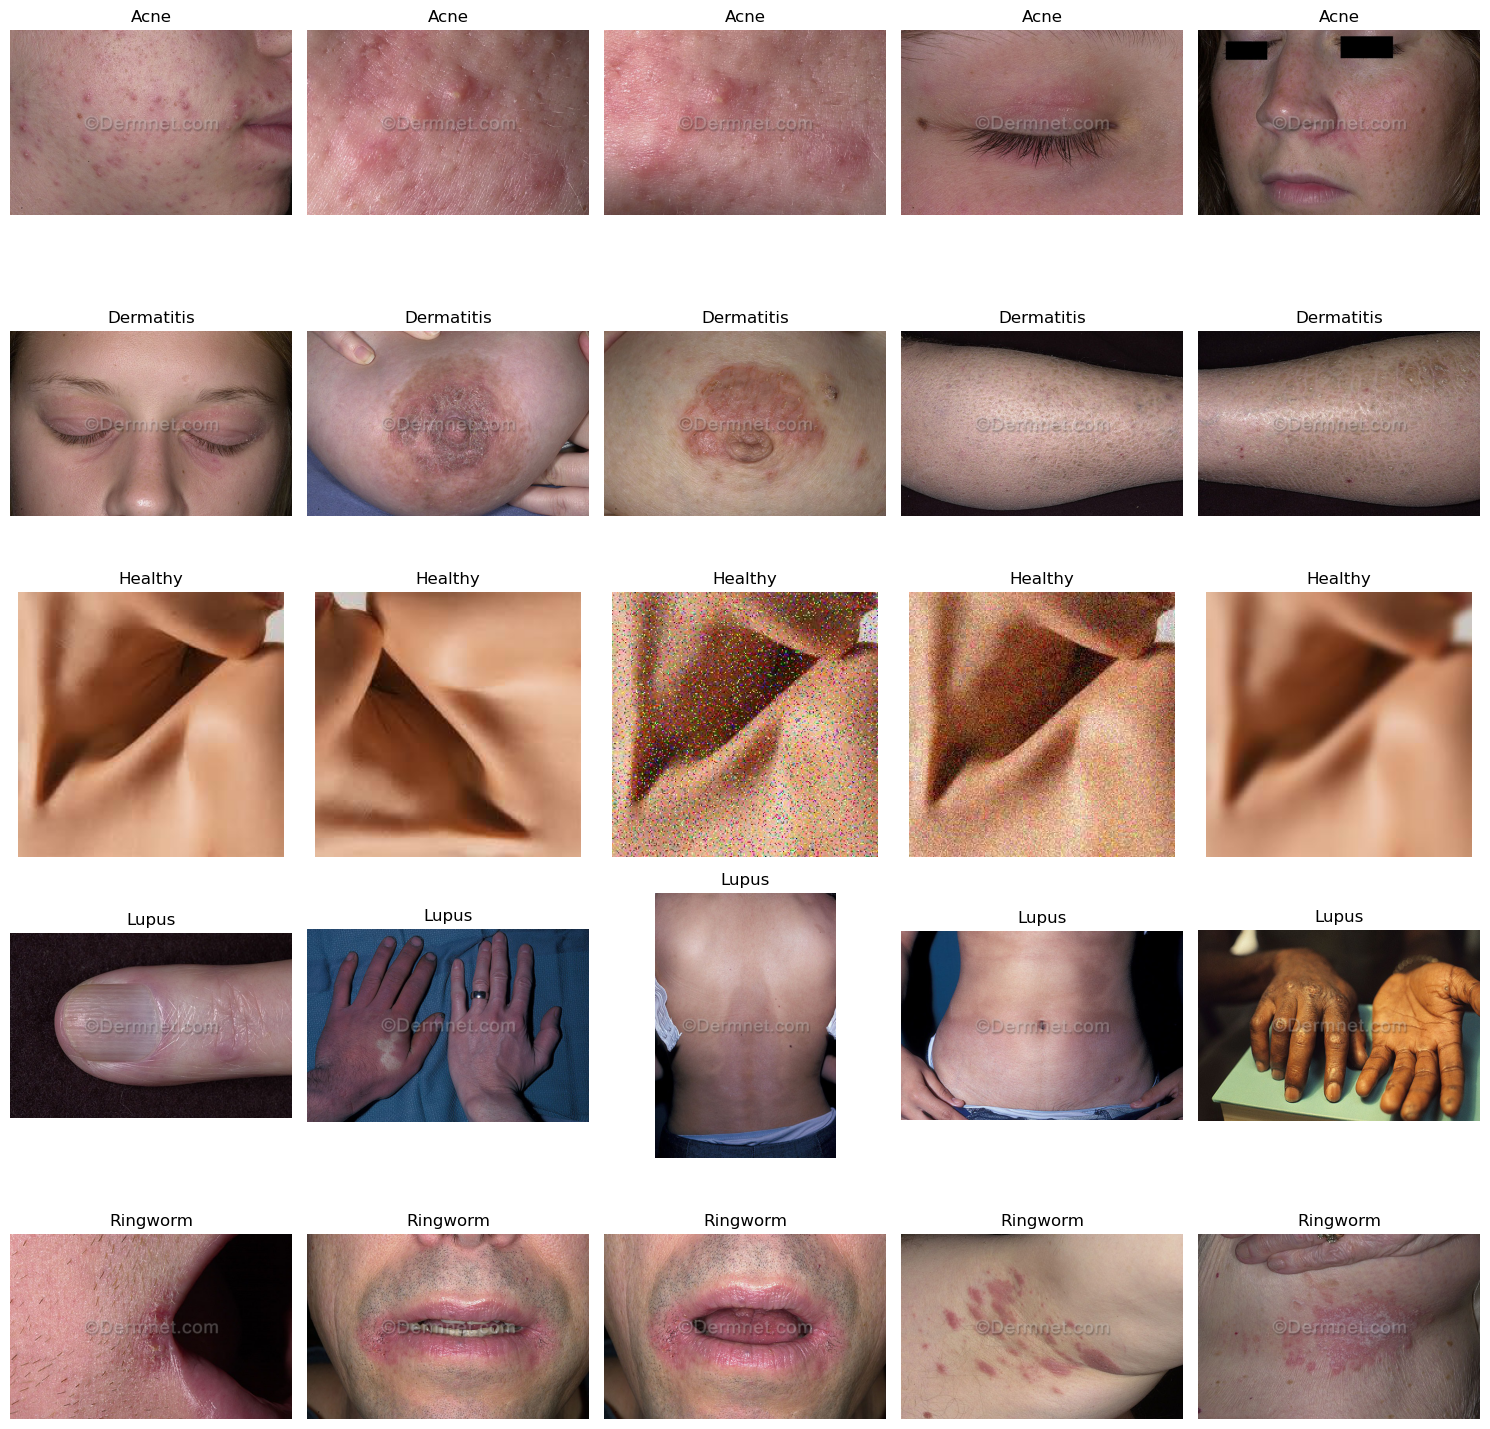

In [4]:

# Display sample images from each class
classes = list(train_generator.class_indices.keys())
fig, axes = plt.subplots(len(classes), 5, figsize=(15, len(classes)*3))

for i, cls in enumerate(classes):
    cls_dir = os.path.join(train_dir, cls)
    img_files = os.listdir(cls_dir)[:5]
    for j, img_file in enumerate(img_files):
        img_path = os.path.join(cls_dir, img_file)
        img = plt.imread(img_path)
        axes[i, j].imshow(img)
        axes[i, j].set_title(cls)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()



In [5]:
# Load pre-trained MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(5, activation='softmax')  # 5 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with a separate validation set
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator
)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Epoch 1/30


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


203/203 ━━━━━━━━━━━━━━━━━━━━ 611s 3s/step - accuracy: 0.6316 - loss: 1.1165 - val_accuracy: 0.7220 - val_loss: 1.1568
Epoch 2/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 482s 2s/step - accuracy: 0.7894 - loss: 0.5681 - val_accuracy: 0.7202 - val_loss: 0.9860
Epoch 3/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 453s 2s/step - accuracy: 0.8284 - loss: 0.4508 - val_accuracy: 0.6691 - val_loss: 1.2323
Epoch 4/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 451s 2s/step - accuracy: 0.8474 - loss: 0.4113 - val_accuracy: 0.6517 - val_loss: 0.9865
Epoch 5/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 497s 2s/step - accuracy: 0.8619 - loss: 0.3732 - val_accuracy: 0.6559 - val_loss: 1.0451
Epoch 6/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 455s 2s/step - accuracy: 0.8775 - loss: 0.3275 - val_accuracy: 0.7538 - val_loss: 0.8270
Epoch 7/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 450s 2s/step - accuracy: 0.8854 - loss: 0.3045 - val_accuracy: 0.7979 - val_loss: 0.6509
Epoch 8/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 452s 2s/step - accuracy: 0.8881 - loss: 0.3075 - val_accuracy: 0.850

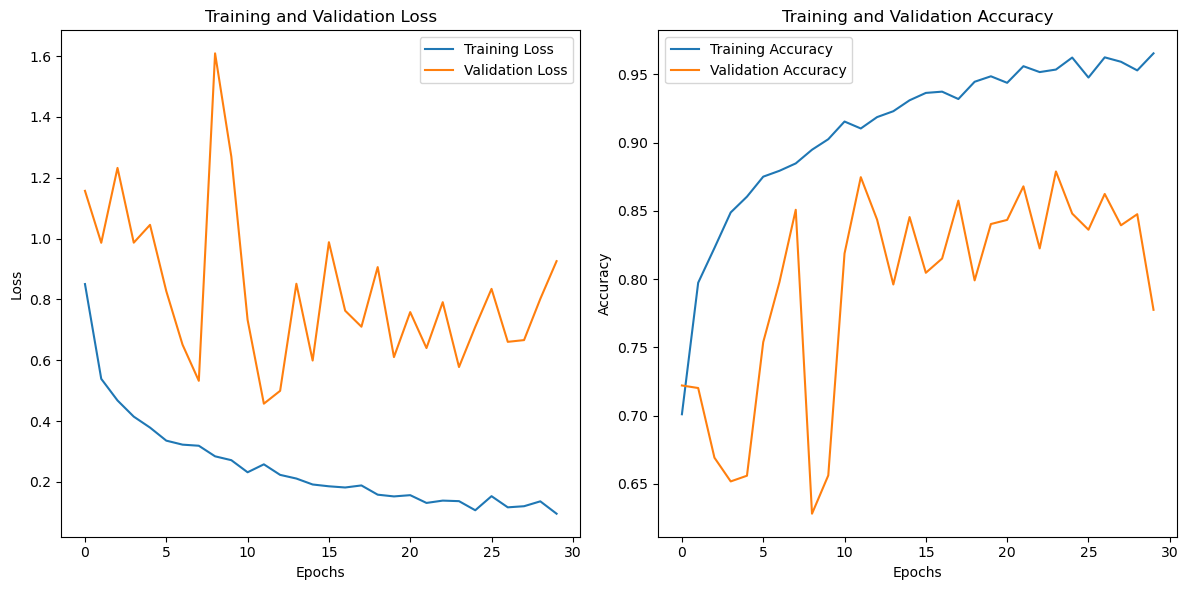

In [8]:
# Plot training/validation loss and accuracy
plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Found 4310 images belonging to 5 classes.
135/135 ━━━━━━━━━━━━━━━━━━━━ 61s 451ms/step - accuracy: 0.7852 - loss: 0.7412
135/135 ━━━━━━━━━━━━━━━━━━━━ 67s 487ms/step


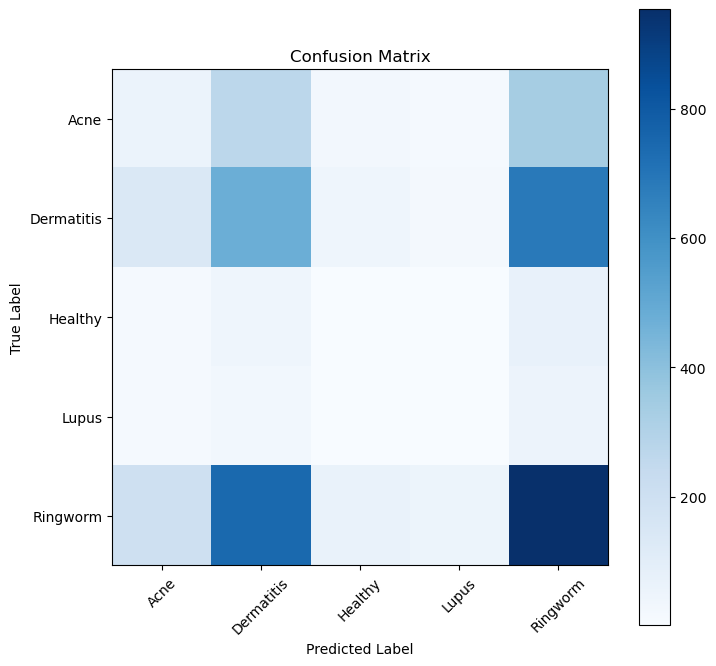

Test accuracy: 0.7870


In [9]:
# Evaluate on test data
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_acc = model.evaluate(test_generator)

# Generate confusion matrix
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices, rotation=45)
plt.yticks(tick_marks, test_generator.class_indices)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Show the confusion matrix plot
plt.show()

# Print test accuracy
print(f"Test accuracy: {test_acc:.4f}")